<a href="https://colab.research.google.com/github/babakkeshavarz/time_series/blob/main/HoltWinters_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

File ‘perrin-freres-monthly-champagne.csv’ already there; not retrieving.



In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [2]:
!head perrin-freres-monthly-champagne.csv

Month,Perrin Freres monthly champagne sales millions ?64-?72
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946
1964-06,3036
1964-07,2282
1964-08,2212
1964-09,2922


In [7]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv' ,
                 index_col= 'Month',
                 skipfooter=2,
                 parse_dates = True)

<ipython-input-7-19779081a862>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('perrin-freres-monthly-champagne.csv' ,


In [11]:
df.columns = ['Sales']

In [13]:
df.index.freq = 'MS'

In [21]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [22]:
train['Sales']

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1971-05-01    5010
1971-06-01    4874
1971-07-01    4633
1971-08-01    1659
1971-09-01    5951
Freq: MS, Name: Sales, Length: 93, dtype: int64

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw = ExponentialSmoothing(train['Sales'],
                          initialization_method= 'legacy-heuristic',
                          trend = 'add',
                          seasonal = 'mul',
                          seasonal_periods= 12
                          )

res_hw = hw.fit()

In [46]:
df.loc[train_idx , 'HoltWintersTrain'] = res_hw.fittedvalues
df.loc[test_idx , 'HoltWintersTest'] = res_hw.forecast(Ntest)

<Axes: xlabel='Month'>

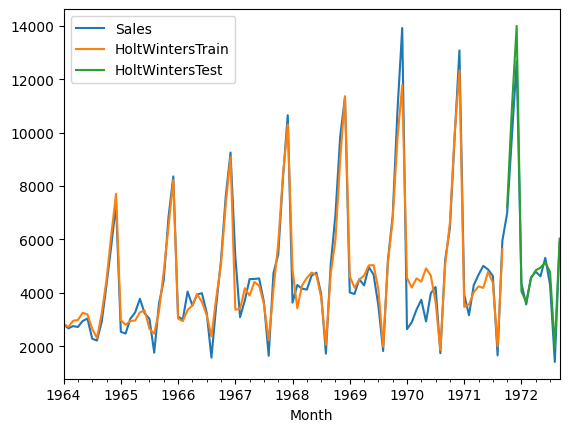

In [47]:
df[['Sales','HoltWintersTrain' , 'HoltWintersTest']].plot()

In [48]:
print(r2_score(train['Sales'] , res_hw.fittedvalues))
print(r2_score(test['Sales'] , res_hw.forecast(Ntest)))

0.9384142140780656
0.9618946829006546
